## AnaChart Code

### Ava Lawless

### Part One: Organizing Data on Tesla and Google Stock

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('from2021.csv')

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

cols = ['date', 'ticker', 'rating_after']

df_after = df[cols]

df_tesla = df_after[df_after['ticker'] == 'TSLA'].copy()
df_google = df_after[df_after['ticker'] == 'GOOGL'].copy()

df_tesla = df_tesla.sort_values('date')
df_google = df_google.sort_values('date')

In [3]:
df_tesla.head()

,date,ticker,rating_after
10,2021-12-06,TSLA,SECTOR PERFORM
12,2021-12-07,TSLA,NEUTRAL
21,2021-12-14,TSLA,NEUTRAL
26,2021-12-22,TSLA,SECTOR PERFORM
27,2021-12-23,TSLA,NEUTRAL


In [4]:
#replacing other words and spellings for "buy" with just "buy"

df_tesla['rating_after'].replace(['Buy                          ', 'BUY                          ', 'OUTPERFORM                   ', 'OVERWEIGHT                   ', 'OVERWEIGHT', 'BUY', 'OUTPERFORM', 'POSITIVE', "OUTPERFORM'                 ", 'Outperform                   ', 'Overweight                   ', 'STRONG BUY', 'BUY)', 'Outperform', 'STRONGBUY', 'Buy', 'Overweight', '€ŒOUTPERFORM                 ', 'Top Pick                     '], 'buy', inplace=True) 

/tmp/ipykernel_154/2114304397.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_tesla['rating_after'].replace(['Buy                          ', 'BUY                          ', 'OUTPERFORM                   ', 'OVERWEIGHT                   ', 'OVERWEIGHT', 'BUY', 'OUTPERFORM', 'POSITIVE', "OUTPERFORM'                 ", 'Outperform                   ', 'Overweight                   ', 'STRONG BUY', 'BUY)', 'Outperform', 'STRONGBUY', 'Buy', 'Overweight', '€ŒOUTPERFORM                 ', 'Top Pick                     '], 'b

In [5]:
#replacing other words and spellings for "sell" with just "sell"

df_tesla['rating_after'].replace(['UNDERWEIGHT', 'SELL', 'SHORT', 'Sell', 'Reduce                       ', 'NEGATIVE', 'REDUCE', 'Underweight', 'Reduce', 'UNDERWEIGHT                  ', 'SELL                         ', 'UNDERPERFORM                 ', 'REDUCE                       '], 'sell', inplace=True)

In [6]:
drop_tesla = ['SECTOR PERFORM               ', 'NEUTRAL',
       'NEUTRAL                      ', 'sell', 'buy',
       'IN LINE                      ', 'MARKET PERFORM               ',
       'EQUAL WEIGHT                 ', 'Equal Weight                 ',
       'SECTOR PERFORM', 'Market Perform               ', 'EQUAL WEIGHT',
       'Perform', 'EQUALWEIGHT', 'IN LINE', 'HOLD', 'Neutral',
       'Equal Weight', 'HOLD                         ', 'Market Perform',
       'Neutral                      ', 'Hold',
       'Perform                      ', 'In Line']

In [7]:
df_tesla = df_tesla[~df['rating_after'].str.contains('|'.join(drop_tesla))]

/tmp/ipykernel_154/330444396.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tesla = df_tesla[~df['rating_after'].str.contains('|'.join(drop_tesla))]


In [8]:
df_tesla

,date,ticker,rating_after
29,2021-12-30,TSLA,sell
30,2021-12-31,TSLA,buy
31,2021-12-31,TSLA,buy
33,2022-01-03,TSLA,buy
34,2022-01-03,TSLA,buy
...,...,...,...
3573,2025-07-08,TSLA,buy
3610,2025-07-24,TSLA,buy
3611,2025-07-24,TSLA,buy
3622,2025-08-04,TSLA,buy


In [9]:
df_tesla = df_tesla.reset_index()

### Cleaning google

In [10]:
df_google['rating_after'].unique()

array(['BUY                          ', 'STRONG BUY                   ',
       'POSITIVE                     ', 'OVERWEIGHT                   ',
       'OUTPERFORM                   ', 'Buy                          ',
       'Positive                     ', 'IN LINE',
       'Overweight                   ', 'OVERWEIGHT', 'Buy',
       'Outperform                   ', 'NEUTRAL', 'OUTPERFORM', 'BUY',
       'Market Outperform            ', 'Market Outp', 'Hold',
       'Market Perform', 'Strong Buy', 'Positive',
       'NEUTRAL                      ', 'MARKET PERFORM               ',
       'Outperform', 'Overweight', 'HOLD                         ',
       'Neutral', 'Neutral                      ', 'HOLD', 'Market Perf',
       'PEERPERFORM                  ', 'Market Outperf'], dtype=object)

In [11]:
df_google['rating_after'].replace(['BUY                          ', 'STRONG BUY                   ',
       'POSITIVE                     ', 'OVERWEIGHT                   ',
       'OUTPERFORM                   ', 'Buy                          ',
       'Positive                     ', 'Overweight                   ', 'OVERWEIGHT', 'Buy',
       'Outperform                   ', 'OUTPERFORM', 'BUY',
       'Market Outperform            ', 'Market Outp', 'Strong Buy', 'Positive', 'Outperform', 'Overweight', 'Market Outperf'], 'buy', inplace=True)

/tmp/ipykernel_154/1851673013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_google['rating_after'].replace(['BUY                          ', 'STRONG BUY                   ',


In [12]:
drop_google = ['IN LINE', 'NEUTRAL', 'Hold', 'Market Perform',
       'NEUTRAL                      ', 'MARKET PERFORM               ',
       'HOLD                         ', 'Neutral',
       'Neutral                      ', 'HOLD', 'Market Perf',
       'PEERPERFORM                  ']

In [13]:
df_google = df_google[~df['rating_after'].str.contains('|'.join(drop_google))]

/tmp/ipykernel_154/3477142387.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_google = df_google[~df['rating_after'].str.contains('|'.join(drop_google))]


In [14]:
df_google['rating_after'].unique()

array(['buy'], dtype=object)

In [15]:
df_google['rating_after'].value_counts()

rating_after
buy    377
Name: count, dtype: int64

In [16]:
df_google = df_google.reset_index()

In [17]:
df_google.head()

,index,date,ticker,rating_after
0,4,2021-12-02,GOOGL,buy
1,7,2021-12-03,GOOGL,buy
2,68,2022-01-19,GOOGL,buy
3,69,2022-01-19,GOOGL,buy
4,77,2022-01-24,GOOGL,buy


In [18]:
df_google.head()

,index,date,ticker,rating_after
0,4,2021-12-02,GOOGL,buy
1,7,2021-12-03,GOOGL,buy
2,68,2022-01-19,GOOGL,buy
3,69,2022-01-19,GOOGL,buy
4,77,2022-01-24,GOOGL,buy


In [19]:
df_tesla.head()

,index,date,ticker,rating_after
0,29,2021-12-30,TSLA,sell
1,30,2021-12-31,TSLA,buy
2,31,2021-12-31,TSLA,buy
3,33,2022-01-03,TSLA,buy
4,34,2022-01-03,TSLA,buy


## Exploratory Data Analysis of Tesla and Google Stock

In [20]:
import matplotlib.pyplot as plt

change_map = {'negative': -1, 'neutral': 0, 'positive': 1}

df_google['change_numeric'] = df_google['change_in_rating'].map(change_map)
df_tesla['change_numeric'] = df_tesla['change_in_rating'].map(change_map)

df_google['date'] = pd.to_datetime(df_google['date'])
df_tesla['date'] = pd.to_datetime(df_tesla['date'])

plt.figure(figsize=(12, 6))
plt.scatter(df_google['date'], df_google['change_numeric'], 
           alpha=0.6, s=100, label='Google', color='blue')
plt.scatter(df_tesla['date'], df_tesla['change_numeric'], 
           alpha=0.6, s=100, label='Tesla', color='red')

plt.yticks([-1, 0, 1], ['Negative', 'Neutral', 'Positive'])
plt.xlabel('Date')
plt.ylabel('Rating Change')
plt.title('Analyst Rating Changes Over Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

KeyError: 'change_in_rating'

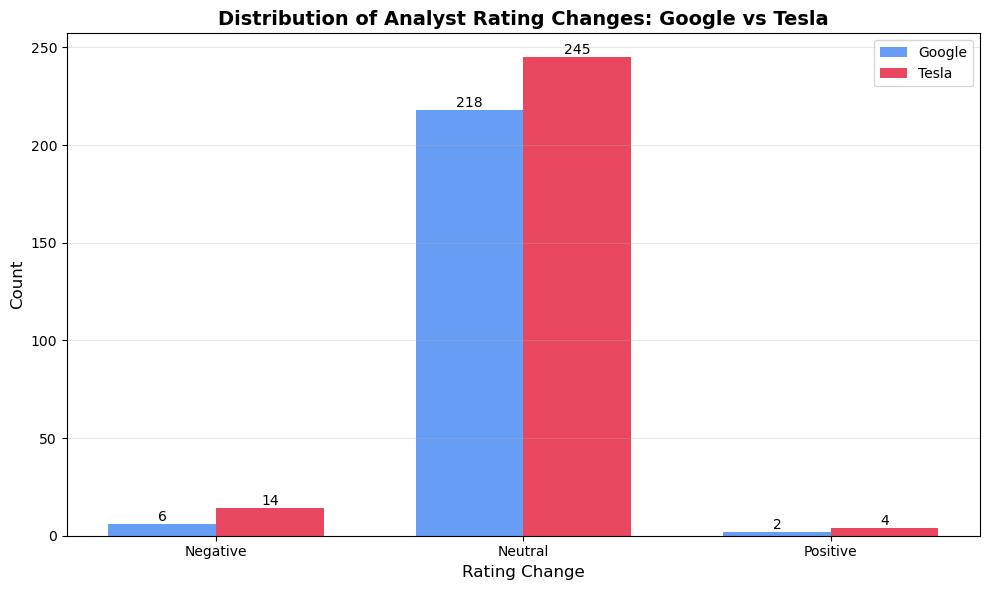

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Count rating changes for each stock
google_counts = df_google['change_in_rating'].value_counts()
tesla_counts = df_tesla['change_in_rating'].value_counts()

# Ensure all categories are present
categories = ['negative', 'neutral', 'positive']
google_values = [google_counts.get(cat, 0) for cat in categories]
tesla_values = [tesla_counts.get(cat, 0) for cat in categories]

# Create bar chart
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, google_values, width, label='Google', color='#4285F4', alpha=0.8)
bars2 = ax.bar(x + width/2, tesla_values, width, label='Tesla', color='#E31937', alpha=0.8)

# Add labels and formatting
ax.set_xlabel('Rating Change', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Analyst Rating Changes: Google vs Tesla', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([c.capitalize() for c in categories])
ax.legend()
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

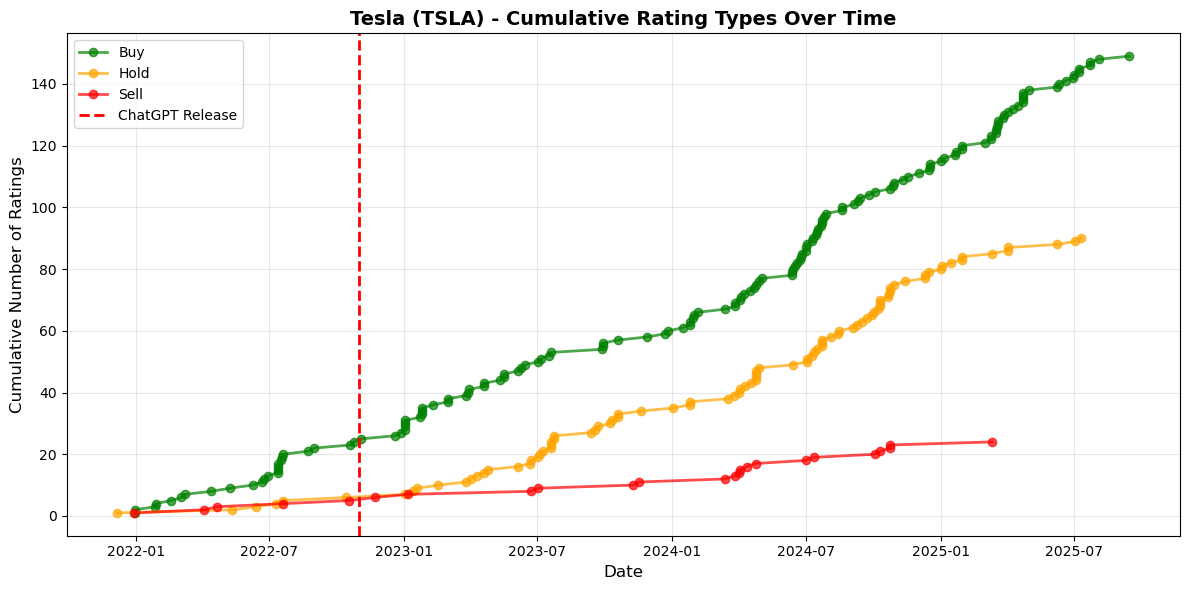

In [75]:
df_tesla['date'] = pd.to_datetime(df_tesla['date'])

df_tesla['rating_after_clean'] = df_tesla['rating_after'].str.lower()

df_tesla['rating_after_clean'] = df_tesla['rating_after_clean'].replace({
    'neutral': 'hold',
    'overweight': 'buy'
})

df_tesla_sorted = df_tesla.sort_values('date')

cumulative_data = []
for rating in ['buy', 'hold', 'sell']:
    df_rating = df_tesla_sorted[df_tesla_sorted['rating_after_clean'] == rating].copy()
    df_rating['cumulative_count'] = range(1, len(df_rating) + 1)
    cumulative_data.append(df_rating[['date', 'rating_after_clean', 'cumulative_count']])

tesla_cumulative = pd.concat(cumulative_data)

plt.figure(figsize=(12, 6))

colors = {'buy': 'green', 'hold': 'orange', 'sell': 'red'}

for rating in ['buy', 'hold', 'sell']:
    data = tesla_cumulative[tesla_cumulative['rating_after_clean'] == rating]
    plt.plot(data['date'], data['cumulative_count'], 
            label=rating.capitalize(), 
            color=colors[rating], 
            marker='o',
            linewidth=2,
            markersize=6,
            alpha=0.7)

plt.axvline(x=pd.to_datetime('2022-11'), color='red', linestyle='--', linewidth=2, label='ChatGPT Release')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Number of Ratings', fontsize=12)
plt.title('Tesla (TSLA) - Cumulative Rating Types Over Time', fontsize=14, fontweight='bold')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

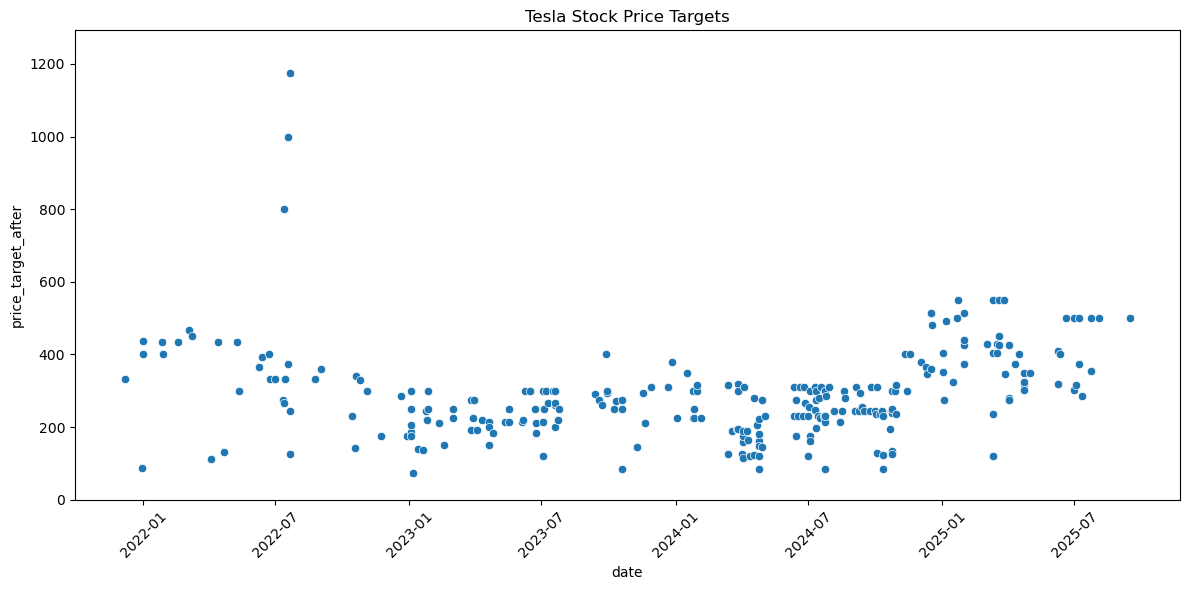

In [70]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='price_target_after', data=df_tesla)
plt.ylim(0, df_tesla['price_target_after'].max() * 1.1)
plt.xticks(rotation=45)
plt.title('Tesla Stock Price Targets')
plt.tight_layout()
plt.show()

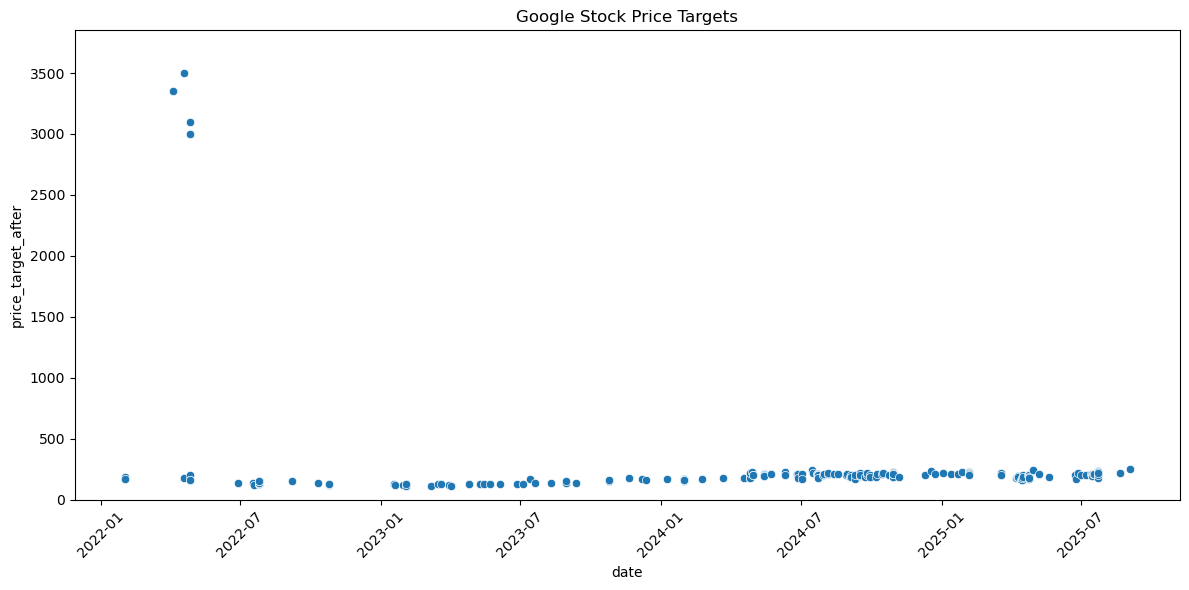

In [71]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='date', y='price_target_after', data=df_google)
plt.ylim(0, df_google['price_target_after'].max() * 1.1) 
plt.xticks(rotation=45)
plt.title('Google Stock Price Targets')
plt.tight_layout()
plt.show()